# DATA  ANALYSIS PROJECT ON PET BOX SUPPLIES AS CASE STUDY

## Background 
**PetMind** is a retailer of products for pets. They are based in the United States, PetMind sells products that are a mix of luxury items and everyday items (Luxury items include toys and Everyday items includes food).
## Problem statement
The company wants to increase sales by selling more everyday products repeatedly.
They have been testing this approach for the last year.
They now want a report on how repeat purchases impact sales.

## Aims and objective
- Perform required cleaning on the dataset
- Use descriptive analysis to determine the relationship between repeat purchase and sales, and other variables that may influence sales.

## Dataset description
The dataset contains sales records in the stores last year, there are 1500 records and 8 fields which includes product_id, category, animal, size, price, sales, rating and repeat_purchase.


#  Field description
|**Field/Column**|**Description**|
|:----| :-----|
|product_id |Nominal. The unique identifier of the product.|
|category|Nominal. The category of the product, one of 6 values (Housing,Food, Toys, Equipment, Medicine, Accessory).|
|animal|Nominal. The type of animal the product is for. One of Dog, Cat, Fish, Bird.|
|size|Ordinal. The size of animal the product is for. Small, Medium, Large.|
|price|Continuous. The price the product is sold at. Can be any positive value, round to 2 decimal places.|
|sales|Continuous. The value of all sales of the product in the last year|
|rating|Discrete. Customer rating of the product from 1 to 10.|
|repeat_purchase|Nominal. Whether customers repeatedly buy the product(1) or not (0)|

## Data Assessment

In [1]:
#import required libraries for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load dataset into pandas dataframe
df = pd.read_csv('pet_supplies_2212.csv')
#Random display of 5 rows of the dataset>
df.sample(5)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
104,105,Housing,Bird,medium,35.95,962.13,2.0,1
628,629,Housing,Fish,medium,15.99,372.62,4.0,0
405,406,Food,Cat,Small,unlisted,1065.98,NaN,1
181,182,Food,Bird,Medium,40.88,1206.88,7.0,1
1241,1242,Equipment,Fish,small,23.06,705.40,4.0,1


In [3]:
# Check shape of dataset
shape = df.shape
print(shape[0]," Rows")
print(shape[1]," Columns")

1500  Rows
8  Columns


In [4]:
# Examine datatypes of each column
df.dtypes

product_id           int64
category            object
animal              object
size                object
price               object
sales              float64
rating             float64
repeat_purchase      int64
dtype: object

In [5]:
# Get information about the entire dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [6]:
# Perform basic statistical analysis 
df.describe()

,product_id,sales,rating,repeat_purchase
count,1500.000000,1500.000000,1350.000000,1500.000000
mean,750.500000,996.597847,4.991111,0.604000
std,433.157015,323.952676,1.559755,0.489228
min,1.000000,286.940000,1.000000,0.000000
25%,375.750000,747.420000,4.000000,0.000000
50%,750.500000,1000.830000,5.000000,1.000000
75%,1125.250000,1158.157500,6.000000,1.000000
max,1500.000000,2255.960000,9.000000,1.000000


In [7]:
# Check for duplicates in all columns
if df.duplicated().any() == False:
    print("No duplicate found!")
else:
    print(df.duplicated().any())

No duplicate found!


In [8]:
null_val_check = df.isnull().any()
for i, v in null_val_check.items():
    if v == True:
        print(f"Null values found in {i} column")
 #   else:
  #      print(f"No null values found in {i} column")

Null values found in rating column


In [9]:
# Number of unique value of the categorical variables
categorical_columns = df[['category','animal', 'size', 'repeat_purchase']]
for col, val in categorical_columns.items():
    print(f"{col} columns contains : {val.unique()}")

category columns contains : ['Food' 'Housing' 'Medicine' 'Toys' 'Equipment' 'Accessory' '-']
animal columns contains : ['Bird' 'Dog' 'Cat' 'Fish']
size columns contains : ['large' 'MEDIUM' 'medium' 'small' 'Small' 'Large' 'SMALL' 'Medium'
 'LARGE']
repeat_purchase columns contains : [1 0]


Assessment of the dataset reveals the following quality issues.
- category: The category column has 1,500 rows, as expected. 6 unique categories are expected('Food', 'Housing', 'Medicine', 'Toys', 'Equipment'and 'Accessory'), but "-" was also found in the values which can be seen as data enry error or missing values.
- Animal: Animal field corresponds to the mentioned unique values('Bird', 'Dog', 'Cat' and 'Fish') but in a wrong datatype.
- size: The size column observations are not in correspondence with the table because three unique values(Small, Medium and Large) are expected but 9 were found because of letter case differences. However, there are no null values and dtype is accurate.
- Price: The price column values doesnt match with the description given on table. The values are not consistent with expected 2 decimal place and the data type is "object" rather than float because of the presence of missing values which appeared as "Unlisted".
- sales: sales field corressponds with the data type and number of rows described in the table. No null values found, however, the expected 2 decimal place is not consistent.
- Rating: Rating field doesn't match the table description. There are 150 missing values in the rating field and but data type is floating point number as expected.


## Data Cleaning

Category Column
- Replace '-' with 'Unknown' category and convert to category format

In [10]:
# Make a copy of the dataFrame
df_copy = df.copy()

In [11]:
# Replace '-' with 'Unknown' category
df['category'] = df['category'].str.replace('-','Unknown')
# Transform to desired data format
df['category'] = df['category'].astype('category')
# Check effect
df['category'].unique()

['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory', 'Unknown']
Categories (7, object): ['Accessory', 'Equipment', 'Food', 'Housing', 'Medicine', 'Toys', 'Unknown']

Animal Column
- Convert data type to category

In [12]:
# Transform to desired data format
df['animal'] = df['animal'].astype('category')
# Check effect
df['animal'].dtype

CategoricalDtype(categories=['Bird', 'Cat', 'Dog', 'Fish'], ordered=False)

Size column
- Standardized the letter cases of all rows to begin with a capital letter for consistency.

In [13]:
# Capitalizze records in size column
df['size'] = df['size'].str.capitalize()
# Transform to desired data format
df['size'] = df['size'].astype('category')
df['size'].unique()

['Large', 'Medium', 'Small']
Categories (3, object): ['Large', 'Medium', 'Small']

Price column
- Replace 'unlisted' records with overall median of price column

In [14]:
# save unlisted records as boolean in condition variable
df['price'] = np.where(df['price'].str.contains('unlisted'), np.nan, df['price']) # Replace unlisted records with NaN
df['price'] = df['price'].astype('float')

In [15]:
# Calculate median price by grouping categorical varibles
median_price = df.groupby(['category', 'size', 'animal'])['price'].median()

In [16]:
# Fill nan values with median_price 
df['price'] = df['price'].fillna(pd.Series(df.set_index(['category', 'size', 'animal'])\
                                           ['price'].fillna(median_price).values))
df['price'] = df['price'].round(decimals = 2)

In [17]:
# Confirmatory check
display(df['price'].isna().any())
df['price'].dtype


False

dtype('float64')

Sales column
- Convert to 2 decimal place 

In [18]:
df['sales'] = df['sales'].round(decimals = 2) #Convert to 2 decimals

Rating 
- Fill missing values with 0 and conver data type to categorical

In [19]:
df['rating'] = df['rating'].fillna(0).astype('category') #Fil null values with 0

In [20]:
# Transform data type to category
df['repeat_purchase'] = df['repeat_purchase'].astype('category')  
df['product_id'] = df['product_id'].astype('category')

In [21]:
df.sample(5)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
848,849,Accessory,Fish,Large,22.88,671.44,2.0,1
954,955,Medicine,Fish,Small,20.26,674.35,6.0,0
1315,1316,Medicine,Cat,Medium,20.04,743.94,6.0,0
752,753,Toys,Fish,Medium,24.06,747.21,7.0,1
626,627,Toys,Fish,Small,29.01,965.99,0.0,0


## Exploratory data Analysis

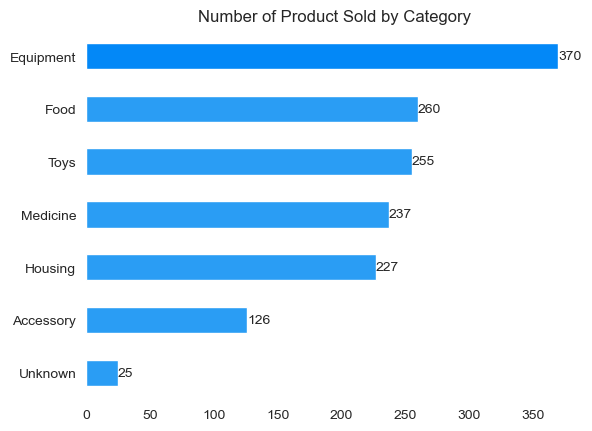

In [22]:
# Plot number of product sales by category
sns.set_style('white')
prod_count = df.groupby('category')['product_id'].count().sort_values(ascending = True)
ax = prod_count.plot(kind = 'barh', color = ['#0388f7' if(x == max(prod_count.values))else '#2a9df4' for x in prod_count.values])
sns.despine(left=True, bottom=True)
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylabel('')
ax.set_title("Number of Product Sold by Category")
ax.margins(y= 0.1)

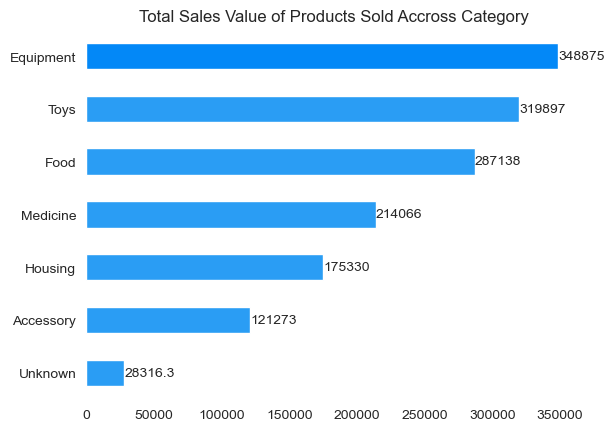

In [23]:
# Plot sales value by category
sales_group = df.groupby('category')['sales'].sum().sort_values(ascending = True)
color = ['#0388f7' if (x == max(sales_group.values)) else '#2a9df4' for x in sales_group.values]
ax2 = sales_group.plot(kind = 'barh', color = color)
sns.despine(left=True, bottom=True)
ax2.bar_label(ax2.containers[0], label_type='edge')
ax2.set_ylabel('')
ax2.set_title("Total Sales Value of Products Sold Accross Category")
ax2.margins(y= 0.1)

In [24]:
sales_group

category
Unknown       28316.27
Accessory    121273.44
Housing      175330.31
Medicine     214066.25
Food         287138.16
Toys         319897.10
Equipment    348875.24
Name: sales, dtype: float64

In [25]:
# Proportion of product sales
df['repeat_purchase'].value_counts(normalize = True)

1    0.604
0    0.396
Name: repeat_purchase, dtype: float64

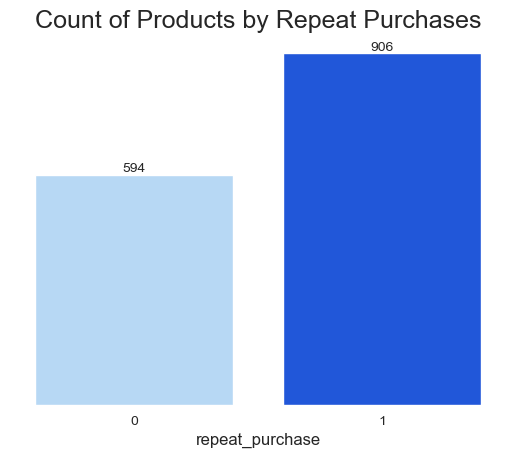

In [26]:
# plot number of products by repeat purchases variable
palette = ['#add9fe','#034bf7']
ax3 = sns.countplot(data = df, x ='repeat_purchase' , palette = palette)
sns.despine(left = True, bottom = True)
ax3.bar_label(ax3.containers[0])
ax3.set_yticks(ticks = [])
ax3.set_ylabel('')
ax3.set_xlabel('repeat_purchase', fontsize = 12)
ax3.set_title('Count of Products by Repeat Purchases', fontsize = 18)
ax2.margins(y= 0.1)

 - As seen in the above countplot, about 60% of the products are repeat purchases

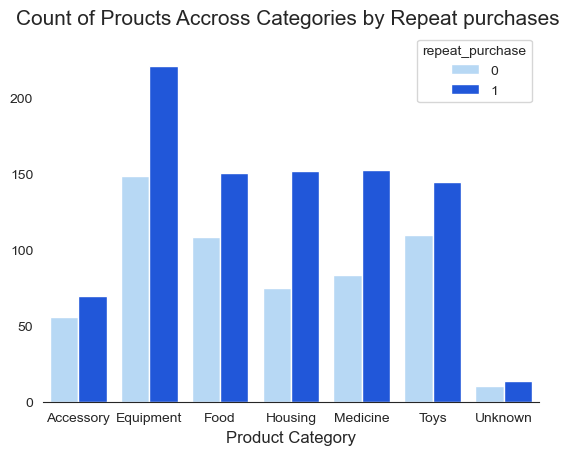

In [27]:
# plot a bar chart to determine number of observations by category and repea_purchase  ---> make this stacked
ax4 = sns.countplot(data = df, x = 'category', hue = 'repeat_purchase', palette = palette)
sns.despine(left = True)
ax4.set_title ('Count of Proucts Accross Categories by Repeat purchases ', fontsize = 15)
ax4.set_xlabel('Product Category',fontsize = 12)
ax4.set_ylabel('')
ax4.margins(y= 0.1)


- The above barchart still maintains that accross the category variable, number of repeat purchase products is higher than products with no repeat purchases. In addition, The equipment category have 370 number of recorded sales, which is the highest when compared with other categories.

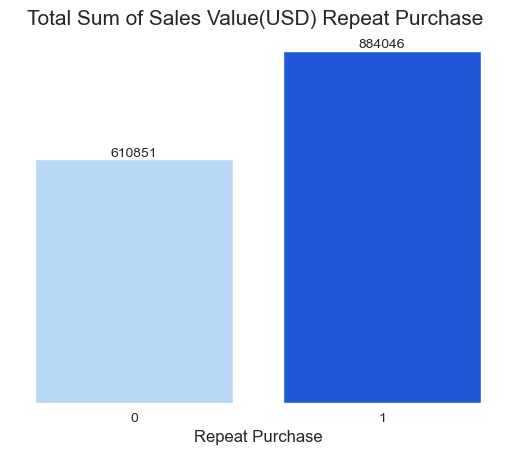

In [28]:
# plot sales value by repeat purchase variable
sales_value_group= df.groupby('repeat_purchase').agg(sum_of_sales=('sales',sum))
ax5 = sns.barplot(data = sales_value_group, x= sales_value_group.index, y = 'sum_of_sales', palette = ['#add9fe','#034bf7'])
ax5.bar_label(ax5.containers[0])
ax5.set_title('Total Sum of Sales Value(USD) Repeat Purchase ',fontsize = 15)
ax5.set(ylabel = '',  yticks = [])
ax5.set_xlabel('Repeat Purchase',fontsize= 12)
ax4.margins(y= 0.1)
sns.despine(left = True, bottom = True)

- The result of plotting the sum of sales by repeat purchase confirms that products with repeated purchases have higher sales value than sale sum of products wih no repeat purchase. This is expected as we have more number of products in the repeated purchased category.

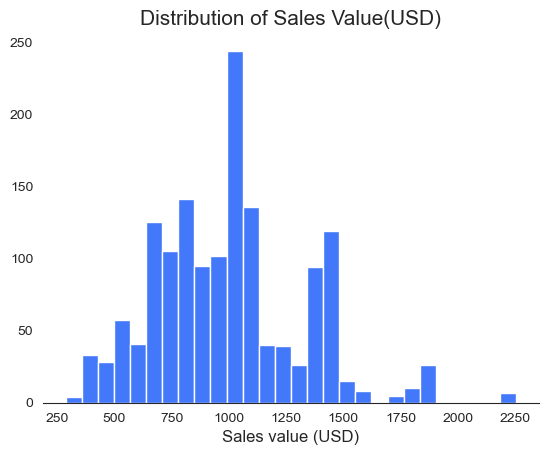

In [29]:
# Aggregate products by item type
ax6 = sns.histplot(data = df , x = 'sales', color ='#034bf7' )
ax6.set_title('Distribution of Sales Value(USD)', fontsize = 15)
ax6.set_ylabel('')
ax6.set_xlabel('Sales value (USD)', fontsize = 12)
sns.despine(left = True)

The sales value of pet products are distributed over a range of approximately 300-2,400, with a spread of 2,100. The center of the distribution is around 1,000. There are gaps and dips observed between 1,200-1,250 and 1,500-1,800, with an outlier seen between 2,100-2,400. The distribution of product sales is somewhat multimodal, with a major peak between 1,000-1,200. It is also evident that the sales data is slightly skewed towards the right, making the distribution asymmetric. Outliers can also be observed at 2250 sales value.

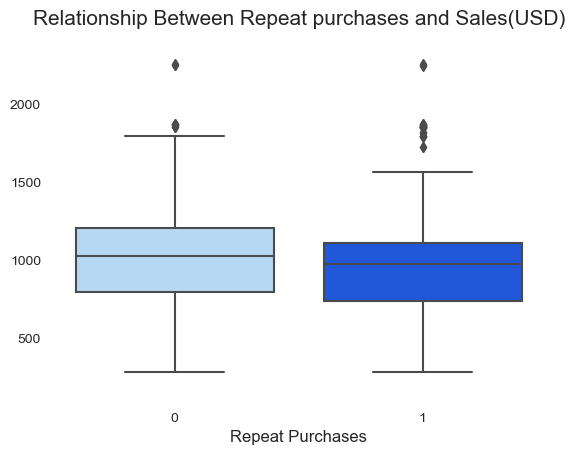

In [30]:
# Relationship between repeat purchases and sales
sns.boxplot(data = df, x = 'repeat_purchase', y = 'sales', palette =palette)
sns.despine(left = True, bottom = True)
plt.title('Relationship Between Repeat purchases and Sales(USD)', fontsize = 15)
plt.xlabel('Repeat Purchases', fontsize = 12)
plt.ylabel('')
plt.margins(0.1)

The above boxplot distribution of sales by repeat purchase variable indicates that products without repeated purchase have a higher interquartile range compared to products with repeated purchases. They also have higher 75th and 25th percentile sales values than products with repeated purchase. An outlier can also be found in both types of products with a sales value of about 2250. The median of the products without repeated purchase is also higher than the median of the products with repeated purchase.

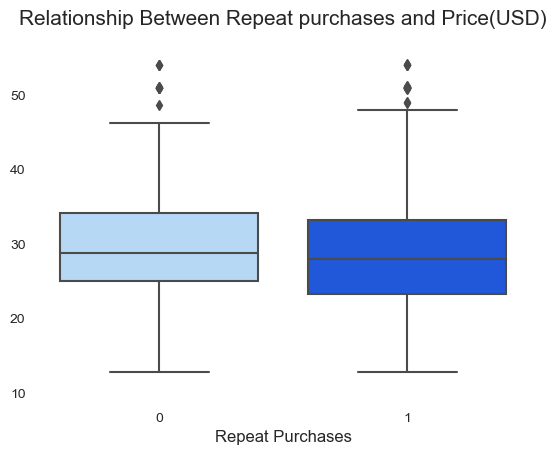

In [31]:
# Plot price distribution 
sns.boxplot(data = df, y ='price', x = 'repeat_purchase', palette =palette)
plt.title('Relationship Between Repeat purchases and Price(USD)', fontsize = 15)
plt.xlabel('Repeat Purchases', fontsize = 12)
plt.ylabel('')
sns.despine(left = True, bottom = True)
plt.margins(0.1)

In [32]:
# Determine correlation coefficient between price and sales
df.corr()

,price,sales
price,1.000000,0.928826
sales,0.928826,1.000000


- Price and sales value of products have a strong positive relationship; the higher the price of products, the higher the sales value.

## Conclusion and Recommendation

From the analysis, about 60% of the products sales recorded by PetMind in the previous year are products that customers purchase repeatedly. Accross all categories, repeated purchase of products have a higher sales value than products with no repeated purchase. However, the distrubution of sales accross repeated purchase variable shows that repeat purchase of products does not necessarily increase the product sales value but increases nuumber of sales record. Therefore, it cannot be considered as an effective method to increase sales value of the everyday products. 
Further analysis to check the distribution of product prices and it's relationship with sales value clearly indicates that averagely,  products with no repeated purchase have a higher price and ultimately, higher sales value.
It can therefore be concluded that the price of products determines their sales value and repeated purchase of products will increase number of sales. Further analysis should be conducted to determine parameters that encourages repeated purchase of products. This might lead to generating insights and identifying if there exists issues with products that are not repeatedly purchased.

                                                                                   Data source: Datacamp practical exercise
                                                                                   Faruq Ilufoye